# Import Dataset

In [3]:
from keras.datasets import cifar100
import numpy
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras import layers

In [4]:
(x_train, _), (x_test, _) = cifar100.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))

x_train= x_train[:5000]
x_test= x_test[6000:7000]

In [5]:
print(x_train.shape)
print(x_test.shape)

(5000, 32, 32, 3)
(1000, 32, 32, 3)


# Add Noises to Images 

In [6]:
# Generate Random Noise (normal (Gaussian) distribution)
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = numpy.clip(x_train_noisy, 0., 1.)
x_test_noisy = numpy.clip(x_test_noisy, 0., 1.)

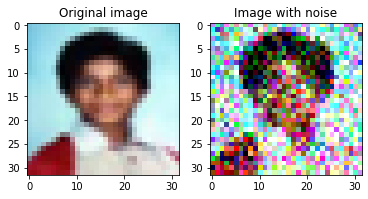

In [7]:
idx = 3
plt.subplot(1,2,1)
plt.imshow(x_train[idx].reshape(32,32,3))
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(x_train_noisy[idx].reshape(32,32,3))
plt.title('Image with noise')
plt.show()

# Model

In [8]:
input_img = keras.Input(shape=(32, 32, 3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                             

In [9]:
encoded_input = keras.Input(shape=(8, 8, 32))
# Decoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_input)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
last = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

decoder = keras.Model(encoded_input, last)
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 8, 8, 32)]        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 up_sampling2d_2 (UpSampling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 up_sampling2d_3 (UpSampling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 3)         867 

# Case 1

In [10]:
# Add noisy Images as the Inout

In [11]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=30, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/30
40/40 [==============================] - 11s 249ms/step - loss: 0.6304 - val_loss: 0.5936
Epoch 2/30
40/40 [==============================] - 10s 242ms/step - loss: 0.5831 - val_loss: 0.5760
Epoch 3/30
40/40 [==============================] - 10s 242ms/step - loss: 0.5688 - val_loss: 0.5700
Epoch 4/30
40/40 [==============================] - 9s 236ms/step - loss: 0.5639 - val_loss: 0.5624
Epoch 5/30
40/40 [==============================] - 10s 242ms/step - loss: 0.5599 - val_loss: 0.5594
Epoch 6/30
40/40 [==============================] - 12s 290ms/step - loss: 0.5589 - val_loss: 0.5584
Epoch 7/30
40/40 [==============================] - 11s 287ms/step - loss: 0.5571 - val_loss: 0.5574
Epoch 8/30
40/40 [==============================] - 10s 260ms/step - loss: 0.5563 - val_loss: 0.5612
Epoch 9/30
40/40 [==============================] - 10s 244ms/step - loss: 0.5567 - val_loss: 0.5559
Epoch 10/30
40/40 [==============================] - 11s 277ms/step - loss: 0.5534 - val_los

In [12]:
# decoded_imgs = autoencoder.predict(x_test_noisy)

# n = 10
# plt.figure(figsize=(20, 4))
# for i in range(1, n + 1):
#     # Display original
#     ax = plt.subplot(2, n, i)
#     plt.imshow(x_test_noisy[i].reshape(32, 32,3))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)

#     # Display reconstruction
#     ax = plt.subplot(2, n, i + n)
#     plt.imshow(decoded_imgs[i].reshape(32, 32,3))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
# plt.show()

In [13]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test_noisy)
print(encoded_imgs.shape)

32/32 [==============================] - 0s 10ms/step
(1000, 8, 8, 32)


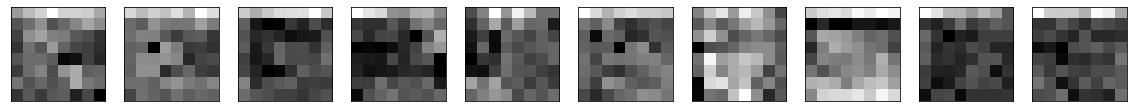

In [14]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i,:,:,0].reshape((8, 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
k = 0
for i in range (10,16):
    decoder.weights[k].assign(autoencoder.weights[i])
    k = k+1
decoded_imgs = decoder.predict(encoded_imgs)
print(decoded_imgs.shape)

32/32 [==============================] - 0s 8ms/step
(1000, 32, 32, 3)


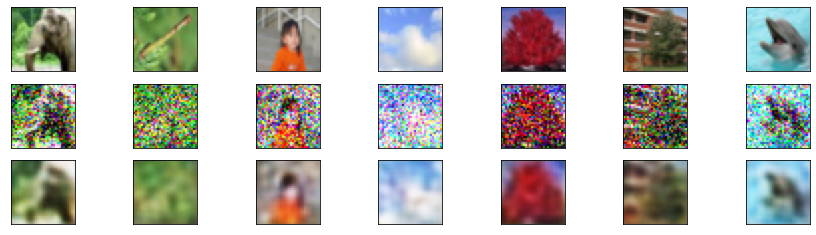

In [16]:
n= 7
plt.figure(figsize=(15, 4))

for i in range(n):
    ax= plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(32,32,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax= plt.subplot(3, n, i+1+n)
    plt.imshow(x_test_noisy[i].reshape(32,32,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax= plt.subplot(3, n, i+1+ 2*n)
    plt.imshow(decoded_imgs[i].reshape(32,32,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()  

# Case 2

In [17]:
# Add Normal Images as the Inout

In [18]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=30, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/30
40/40 [==============================] - 12s 270ms/step - loss: 0.6006 - val_loss: 0.5585
Epoch 2/30
40/40 [==============================] - 11s 282ms/step - loss: 0.5514 - val_loss: 0.5478
Epoch 3/30
40/40 [==============================] - 12s 290ms/step - loss: 0.5458 - val_loss: 0.5450
Epoch 4/30
40/40 [==============================] - 11s 273ms/step - loss: 0.5438 - val_loss: 0.5463
Epoch 5/30
40/40 [==============================] - 11s 279ms/step - loss: 0.5434 - val_loss: 0.5430
Epoch 6/30
40/40 [==============================] - 11s 274ms/step - loss: 0.5422 - val_loss: 0.5427
Epoch 7/30
40/40 [==============================] - 11s 274ms/step - loss: 0.5416 - val_loss: 0.5417
Epoch 8/30
40/40 [==============================] - 12s 299ms/step - loss: 0.5415 - val_loss: 0.5418
Epoch 9/30
40/40 [==============================] - 13s 331ms/step - loss: 0.5409 - val_loss: 0.5413
Epoch 10/30
40/40 [==============================] - 13s 326ms/step - loss: 0.5412 - val_lo

In [19]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test_noisy)
print(encoded_imgs.shape)

32/32 [==============================] - 0s 10ms/step
(1000, 8, 8, 32)


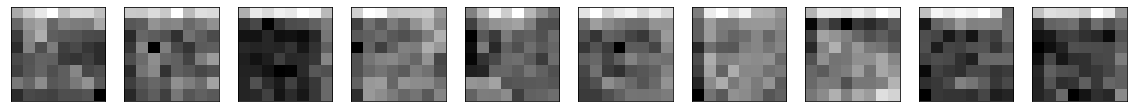

In [20]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i,:,:,0].reshape((8, 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [21]:
k = 0
for i in range (10,16):
    decoder.weights[k].assign(autoencoder.weights[i])
    k = k+1
decoded_imgs = decoder.predict(encoded_imgs)
print(decoded_imgs.shape)

32/32 [==============================] - 0s 10ms/step
(1000, 32, 32, 3)


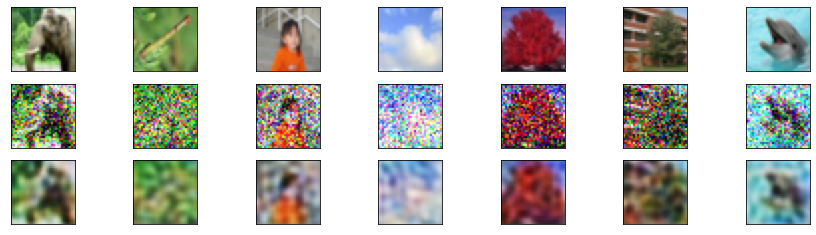

In [22]:
n= 7
plt.figure(figsize=(15, 4))

for i in range(n):
    ax= plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(32,32,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax= plt.subplot(3, n, i+1+n)
    plt.imshow(x_test_noisy[i].reshape(32,32,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax= plt.subplot(3, n, i+1+ 2*n)
    plt.imshow(decoded_imgs[i].reshape(32,32,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()  

# Applying PCA for Denoising

In [23]:
x_test_noisy= x_test_noisy.reshape(-1,3072)

In [69]:
# Step 1
# x_test_noisy = x_test_noisy.reshape((x_test_noisy.shape[0], x_test_noisy.shape[1]**2))  #flattening the image 
X_meaned = x_test_noisy - np.mean(x_test_noisy, axis=0)

# Step 2
cov_mat = np.cov(X_meaned, rowvar = False)
print (cov_mat.shape)
# print (cov_mat)

# Step 3
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
print (eigen_vectors.shape)
# print (eigen_values)

#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
print (sorted_index)
sorted_eigenvalue = eigen_values[sorted_index]

#similarly sort the eigenvectors
sorted_eigenvectors = eigen_vectors[:,sorted_index]

n_components = 100
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
print(eigenvector_subset.shape)

x_reduced = np.dot(eigenvector_subset.transpose(),x_test_noisy.transpose()).transpose()
print(x_reduced.shape)
# x_reduced

(3072, 3072)
(3072, 3072)
[3071 3070 3069 ...    2    1    0]
(3072, 100)
(1000, 100)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 31.5, 31.5, -0.5)

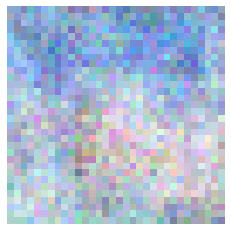

In [70]:
# Compression Image
comp_img= np.matmul(eigenvector_subset, x_reduced[3])
comp_img.shape
plt.imshow(comp_img.reshape(32,32,3) , cmap= 'gray')
plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


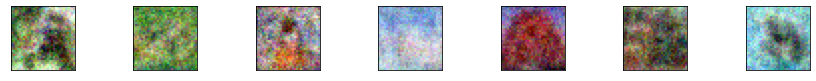

In [71]:
n= 7
plt.figure(figsize=(15, 4))

for i in range(n):
    ax= plt.subplot(3, n, i+1)
    comp_img= np.matmul(eigenvector_subset, x_reduced[i])
    plt.imshow(comp_img.reshape(32,32,3) , cmap= 'gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [72]:
r=  len(x_reduced[3]) / len(x_test_noisy[3]) *100
print(r, '%')

3.2552083333333335 %
